In [53]:
import pydicom as pyd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
from torchvision import transforms
import os
import pandas as pd

In [4]:
ds = pyd.dcmread("./data/nlst_sample/100002__01-02-1999-NA-NLST-LSS-55322__1.000000-0OPAGELSPLUSD3602.512080.00.11.5-35858__1-001.dcm")

In [6]:
arr = ds.pixel_array

In [7]:
type(arr)

numpy.ndarray

In [9]:
arr.shape

(512, 512)

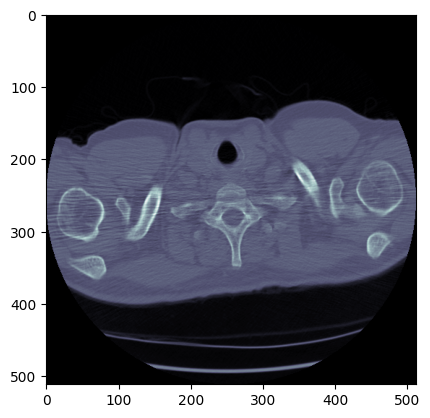

In [43]:
plt.imshow(arr2, cmap="bone")

In [11]:
arr.dtype

dtype('uint16')

In [13]:
arr.max()

2610

In [40]:
arr2 = (arr - arr.min())/(arr.max() - arr.min())

In [42]:
arr2.dtype

dtype('float64')

In [54]:
class CustomImageDataset(Dataset):
    def __init__(self, img_csv, img_dir, transform=None):
        self.img_files = pd.read_csv(img_csv)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_files.iloc[idx, 0])
        image_arr = pyd.dcmread(img_path).pixel_array
        image_arr = (image_arr - image_arr.min())/(image_arr.max() - image_arr.min())
        image_arr = image_arr.astype("float32")
        
        if self.transform:
            image = self.transform(image_arr)
        return image

In [55]:
transform1 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256,256)),
    #transforms.CenterCrop(10),
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float),
    #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [80]:
train_data = CustomImageDataset(img_csv="./data/files_sample.csv", img_dir="./data/nlst_sample/", transform=transform1)

In [81]:
tt = iter(train_data)

In [75]:
for i in range(100):
    ff = next(tt)

In [73]:
ff.shape

torch.Size([1, 256, 256])

In [61]:
ff.dtype

torch.float32

In [62]:
ff.max()

tensor(0.9350)

In [64]:
ff.min()

tensor(0.)

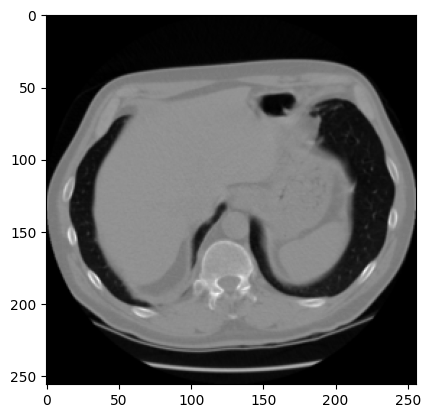

In [76]:
plt.imshow(ff.numpy()[0], cmap="gray")

In [82]:
train_loader = DataLoader(dataset=train_data, batch_size=4, shuffle=True)

In [84]:
len(train_loader)

160